In [26]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = np.genfromtxt("user_data.csv", delimiter=",", usecols=range(1,11), dtype=int)

In [28]:
data  = data / 5
data

array([[5.4, 4.8, 5.8, ..., 8.2, 7.2, 5.8],
       [5.4, 6.8, 6.8, ..., 4. , 4. , 3.8],
       [4.4, 6.2, 4.8, ..., 6. , 5.4, 4.4],
       ...,
       [4.4, 4.4, 5.2, ..., 4.6, 4.8, 4.6],
       [5.8, 5.8, 5.6, ..., 2.8, 4. , 5.2],
       [6.4, 5.6, 7. , ..., 6.4, 6.4, 7.4]])

In [29]:
data.shape

(300, 10)

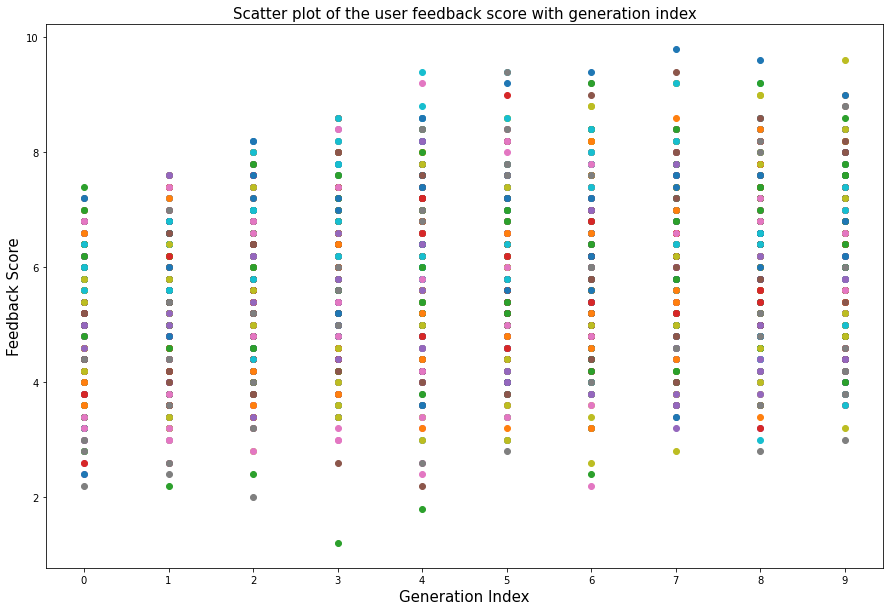

In [30]:
plt.figure(figsize=(15, 10))

for row in data:
    plt.scatter(range(10), row)

plt.title("Scatter plot of the user feedback score with generation index", fontsize=15)
plt.xlabel("Generation Index", fontsize=15)
plt.ylabel("Feedback Score", fontsize=15)
plt.xticks(range(10))

plt.show()

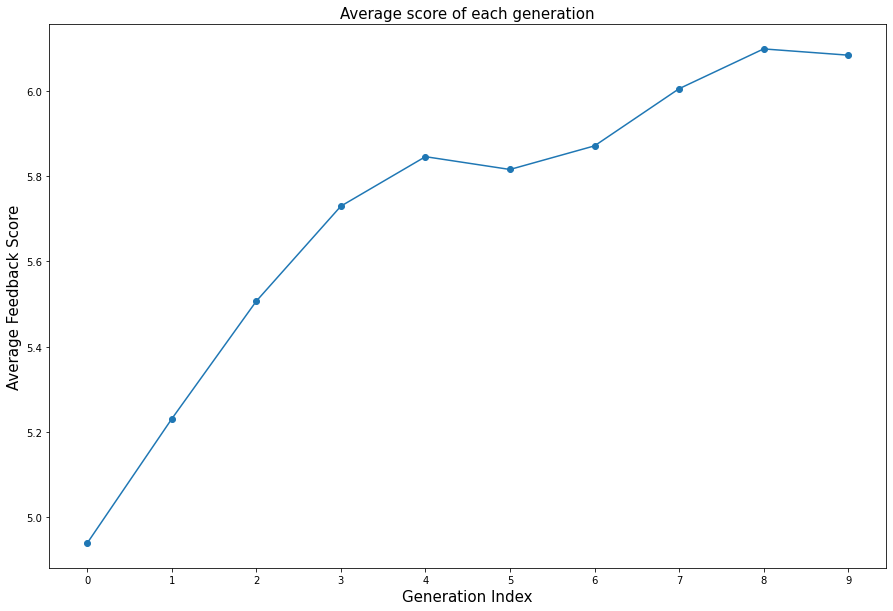

In [31]:
column_means = np.mean(data, axis=0)

plt.figure(figsize=(15, 10))
plt.plot(column_means, marker='o', linestyle='-')

plt.title("Average score of each generation", fontsize=15)
plt.xlabel("Generation Index", fontsize=15)
plt.ylabel("Average Feedback Score", fontsize=15)
plt.xticks(range(10))

plt.show()

In [46]:
column_means

array([4.93933333, 5.23066667, 5.50666667, 5.72933333, 5.84533333,
       5.81533333, 5.87066667, 6.00466667, 6.098     , 6.08333333])

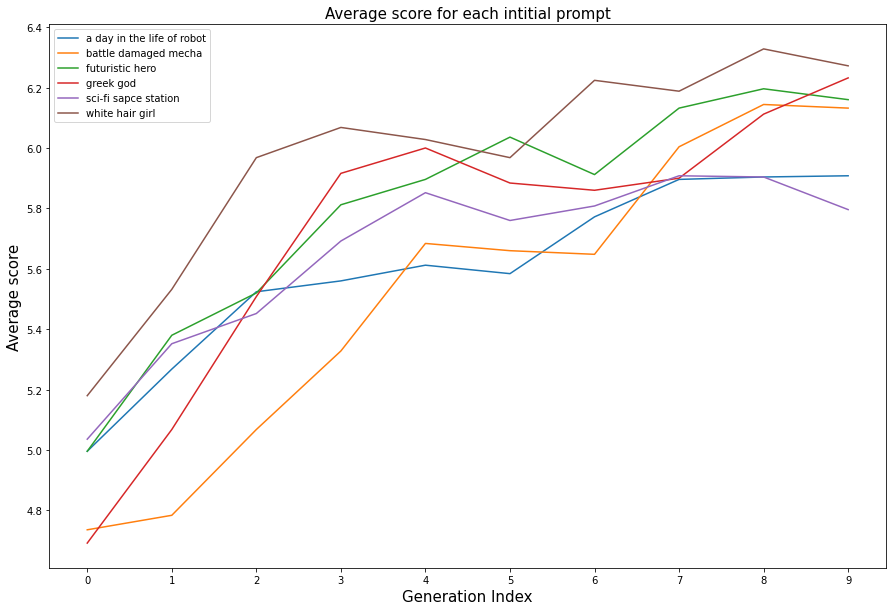

In [32]:
labels = ['a day in the life of robot']*50 + ['futuristic hero']*50 + ['sci-fi sapce station']*50 + ['battle damaged mecha']*50 + ['greek god']*50 + ['white hair girl']*50

unique_labels = np.unique(labels)
averages = []

for label in unique_labels:
    rows = [i for i, l in enumerate(labels) if l == label]
    data_group = data[rows]
    avg = np.mean(data_group, axis=0)
    averages.append(avg)

averages = np.array(averages)

plt.figure(figsize=(15, 10))
for i, label in enumerate(unique_labels):
    plt.plot(averages[i], label=label)

plt.title("Average score for each intitial prompt", fontsize=15)
plt.xlabel("Generation Index", fontsize=15)
plt.ylabel("Average score", fontsize=15)
plt.xticks(range(10))
plt.legend()
plt.show()

In [39]:
greater_than_seven = data[data >= 6]
proportion = len(greater_than_seven) / data.size
print(f"The proportion of elements greater than 6 is: {proportion:.2%}")

The proportion of elements greater than 6 is: 43.13%


In [40]:
greater_than_seven = data[data >= 7]
proportion = len(greater_than_seven) / data.size
print(f"The proportion of elements greater than 7 is: {proportion:.2%}")

The proportion of elements greater than 7 is: 19.40%


In [41]:
greater_than_seven = data[data >= 8]
proportion = len(greater_than_seven) / data.size
print(f"The proportion of elements greater than 8 is: {proportion:.2%}")

The proportion of elements greater than 8 is: 5.50%


In [44]:
first_col = data[:, 0]

comparison = matrix[:, 1:] > first_col[:, np.newaxis]

rows_all_true = np.any(comparison, axis=1)

count_rows_all_true = np.sum(rows_all_true)

proportion = count_rows_all_true / matrix.shape[0]

print(f"The proportion of rows where any prompts in the last 9 generations are greater than the first generations is: {proportion:.2%}")

The proportion of rows where any prompts in the last 9 generations are greater than the first generations is: 94.67%


In [45]:
first_col = matrix[:, 0]
last_col = matrix[:, -1]

comparison = last_col > first_col

count_true = np.sum(comparison)

proportion = count_true / matrix.shape[0]

print(f"The proportion of rows where the prompt in the last generation is greater than the first generation is: {proportion:.2%}")

The proportion of rows where the prompt in the last generation is greater than the first generation is: 70.00%
